<a href="https://colab.research.google.com/github/Stormbreaker06/EDA/blob/main/Food_Delivery_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [4]:
# Importing the dataset
df = pd.read_csv('food_delivery_hub/delivery_orders_with_price.csv')
df

,order_id,latitude,longitude,timestamp,order_value
0,1,12.902981,77.613289,2025-09-07 00:50:30,25.75
1,2,13.015690,77.592072,2025-09-03 05:08:55,18.74
2,3,13.031105,77.602426,2025-09-02 04:42:35,27.77
3,4,13.012824,77.568887,2025-09-03 23:53:15,43.01
4,5,12.979764,77.579361,2025-09-05 10:51:21,17.87
...,...,...,...,...,...
49995,49996,13.043120,77.605086,2025-09-06 15:57:40,20.66
49996,49997,12.967982,77.590314,2025-09-03 10:50:45,19.84
49997,49998,13.029256,77.588358,2025-09-01 05:24:24,25.79
49998,49999,12.917778,77.606718,2025-09-04 18:24:52,22.93


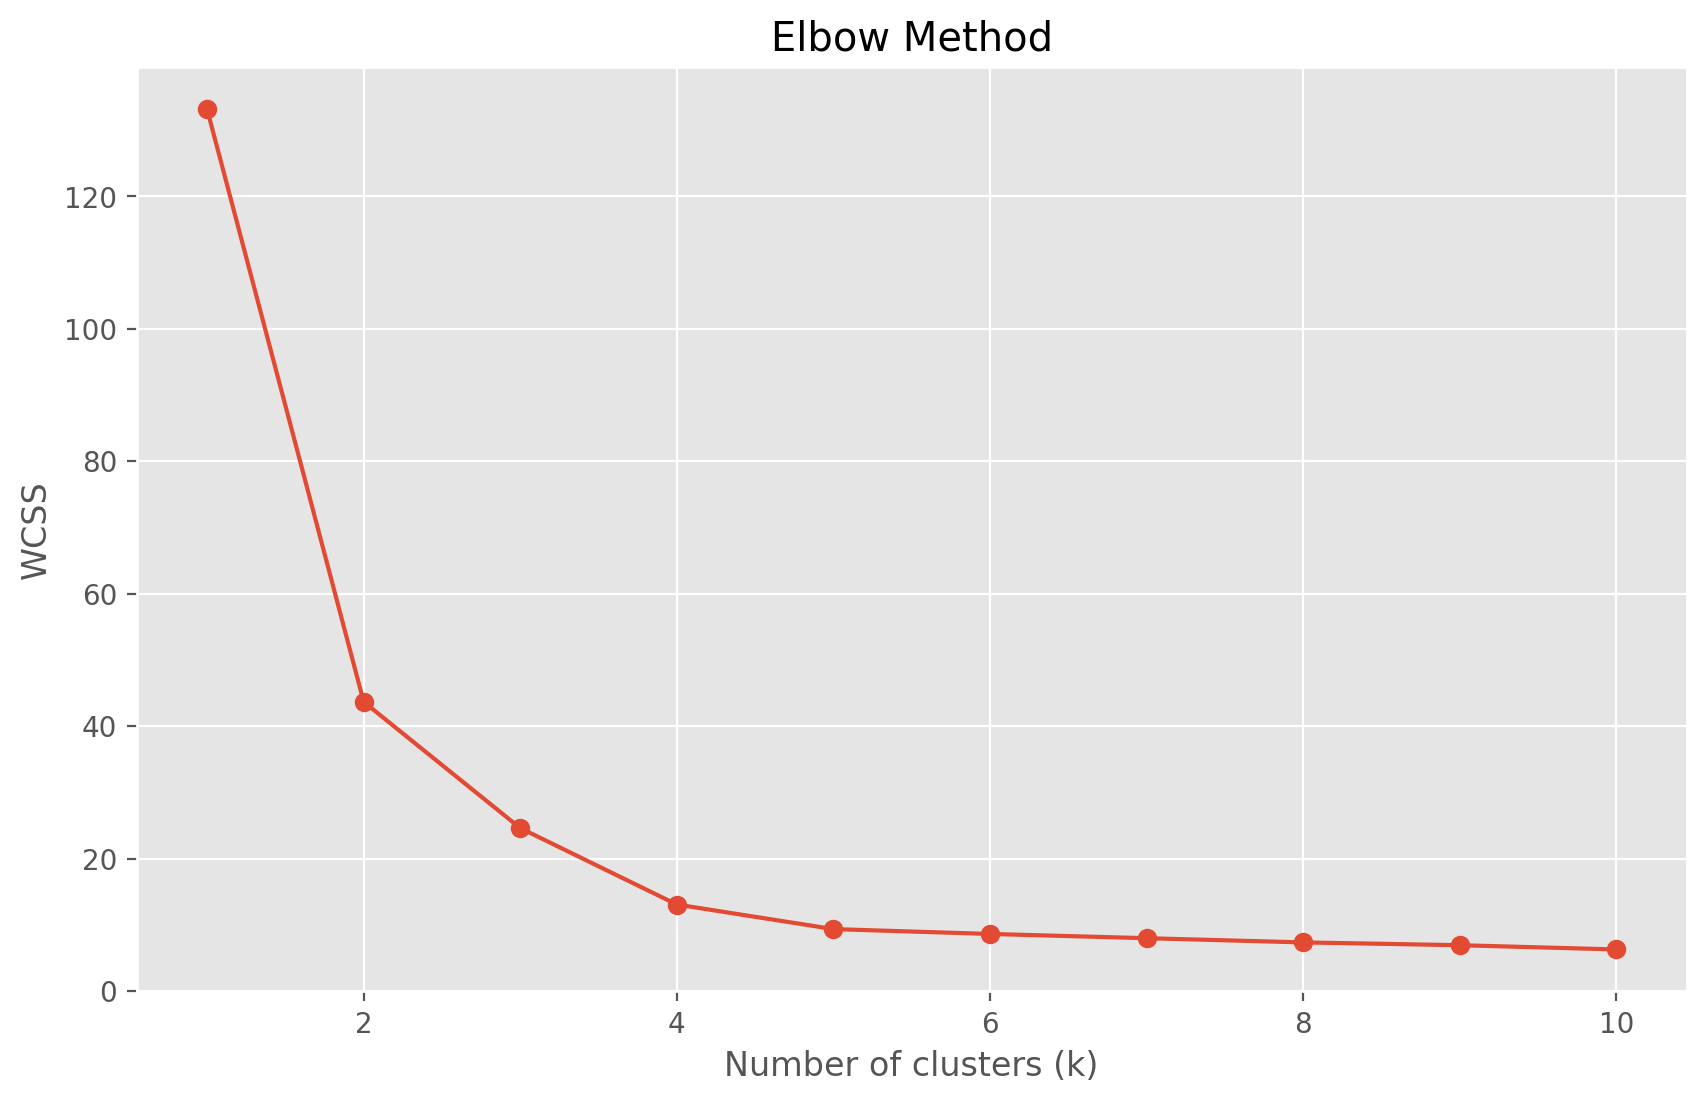

In [5]:
X = df[['latitude', 'longitude']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [6]:

optimal_k = 6


kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)


df['cluster'] = clusters


centroids = kmeans.cluster_centers_


print("Coordinates of the identified delivery hotspots (cluster centers):")
for i, centroid in enumerate(centroids):
    print(f"Hotspot {i+1}: Latitude = {centroid[0]:.4f}, Longitude = {centroid[1]:.4f}")

Coordinates of the identified delivery hotspots (cluster centers):
Hotspot 1: Latitude = 12.9423, Longitude = 77.6173
Hotspot 2: Latitude = 12.9985, Longitude = 77.5536
Hotspot 3: Latitude = 13.0359, Longitude = 77.5970
Hotspot 4: Latitude = 12.9127, Longitude = 77.6087
Hotspot 5: Latitude = 12.9296, Longitude = 77.6300
Hotspot 6: Latitude = 12.9722, Longitude = 77.5942


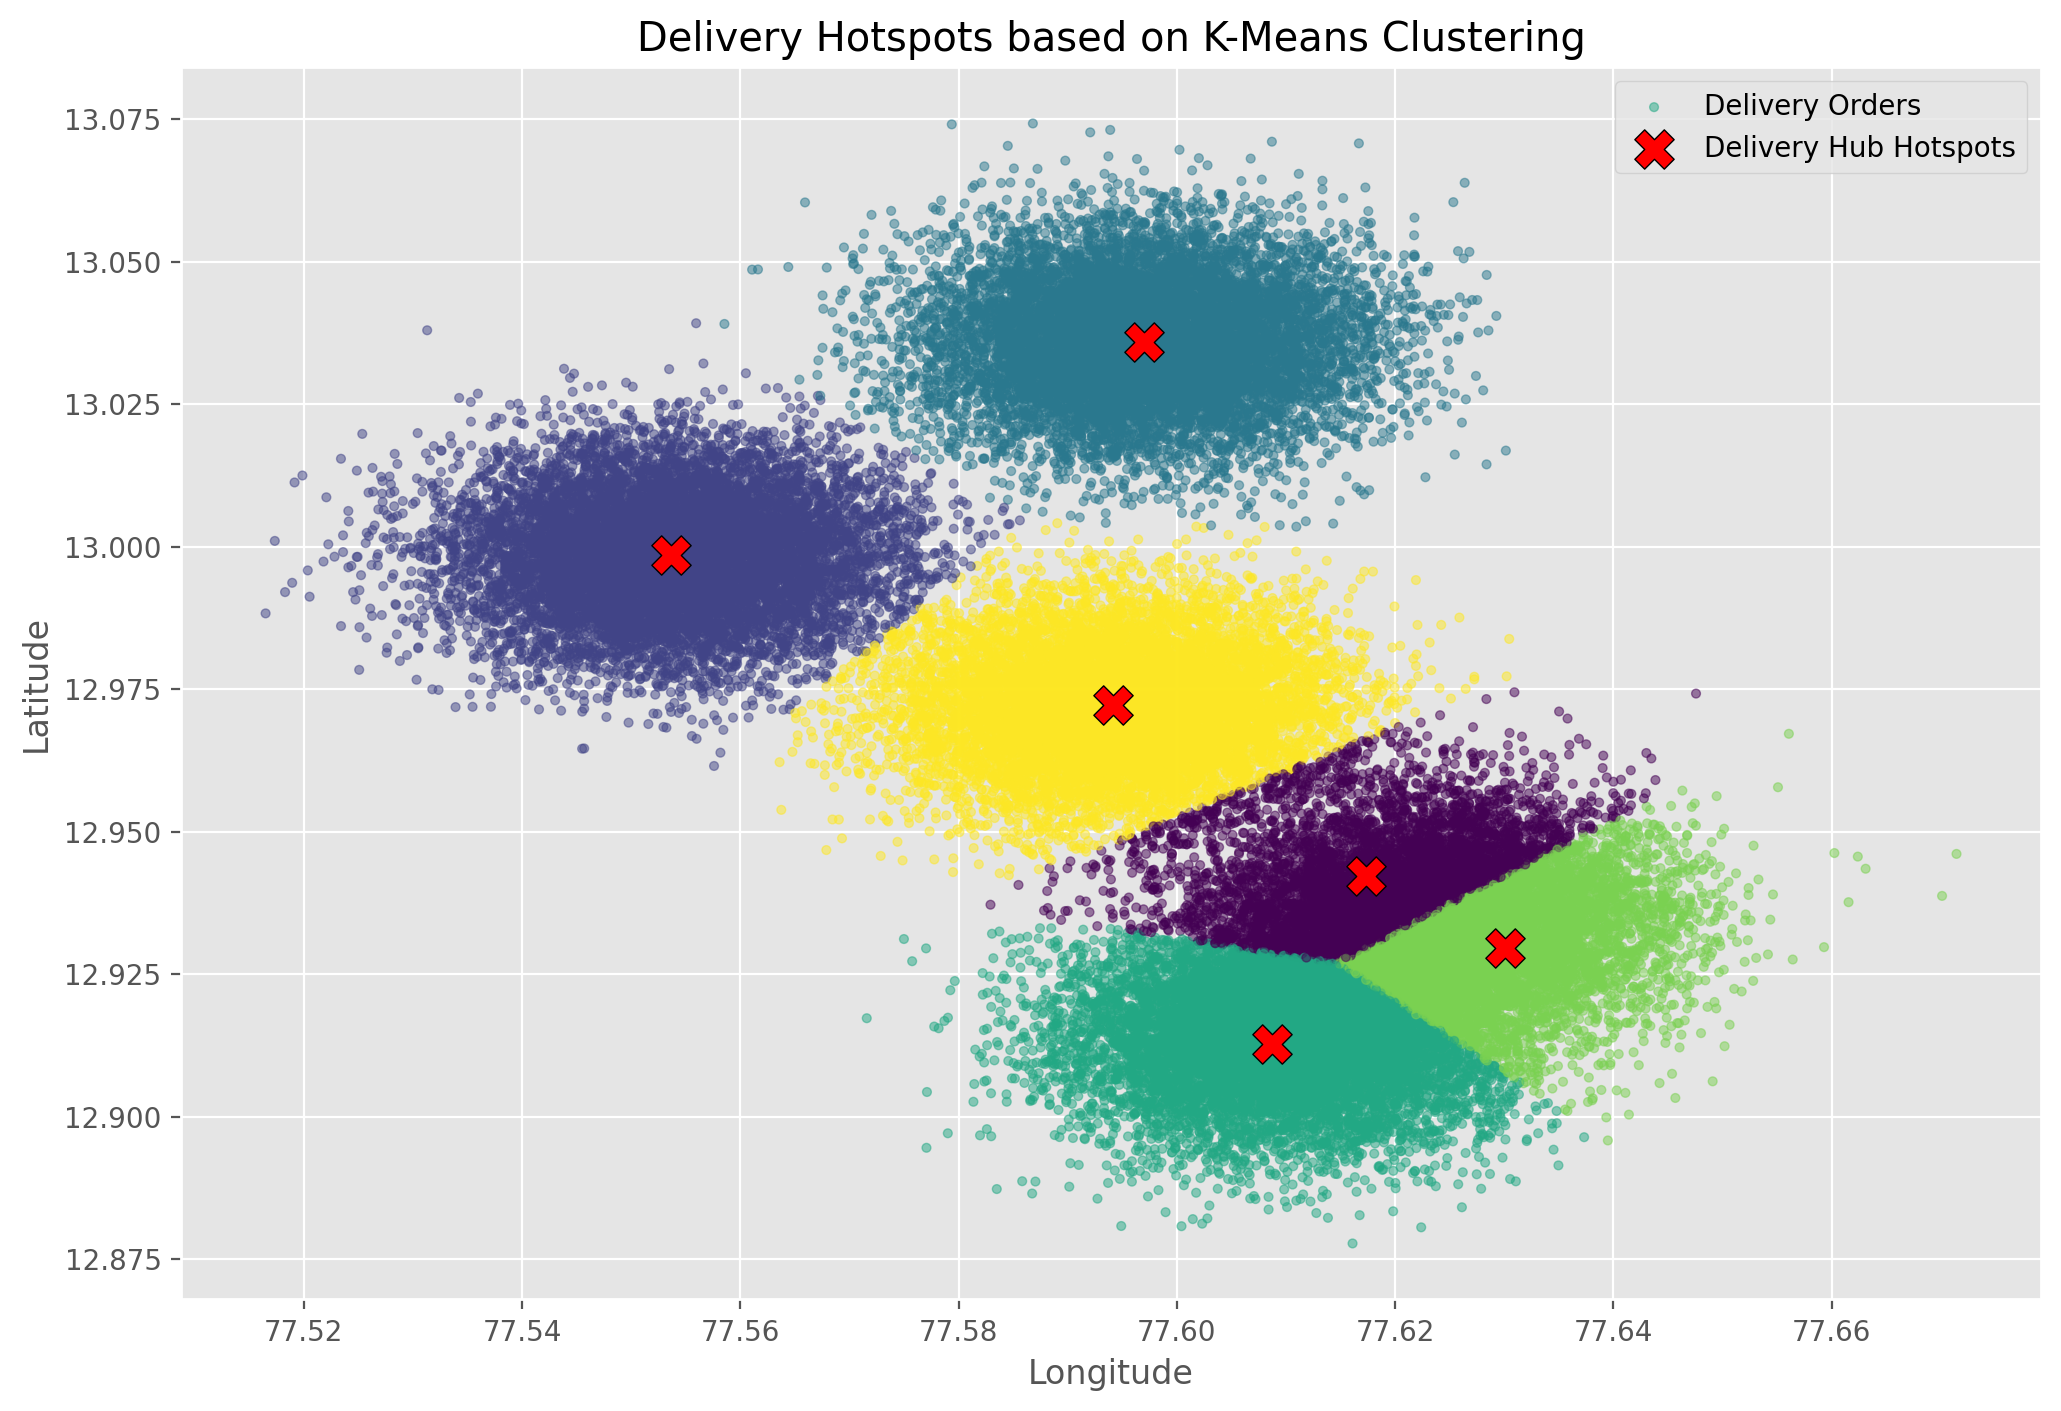

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', s=10, alpha=0.5, label='Delivery Orders')
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=200, marker='X', edgecolors='black', label='Delivery Hub Hotspots')
plt.title('Delivery Hotspots based on K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()